<h3>Introduction to Classification</h3>

In [1]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


In [6]:
teamlogs = pd.read_csv("Data/AllLogs.csv")

In [7]:
teamlogs.head(10)

,IsHome,Result,TeamRest,2PPctAllowed,3PPctAllowed,PTSAllowed,ORBAllowed,DRBAllowed,TRBAllowed,STLAllowed,...,ORB_Opp,DRB_Opp,TRB_Opp,STL_Opp,BLK_Opp,TOV_Opp,PF_Opp,Poss_Opp,DefRating_Opp,OffRating_Opp
0,0,0,2.0,0.475977,0.370288,96.210526,12.052632,31.368421,43.421053,7.578947,...,12.368421,31.552632,43.921053,8.473684,5.921053,15.815789,21.236842,87.335526,99.200330,108.564972
1,0,1,2.0,0.482014,0.277228,94.000000,12.333333,33.000000,45.333333,6.333333,...,9.750000,35.250000,45.000000,8.250000,3.500000,13.750000,21.250000,91.793750,124.895286,115.476272
2,1,1,2.0,0.500000,0.430894,117.800000,10.000000,36.400000,46.400000,9.600000,...,7.000000,33.000000,40.000000,9.000000,6.800000,18.600000,20.400000,74.485000,112.794711,126.468417
3,1,1,2.0,0.488707,0.363095,98.215686,11.274510,29.686275,40.960784,7.568627,...,9.980000,29.840000,39.820000,6.720000,4.000000,13.680000,19.780000,89.343500,116.809810,105.211907
4,0,0,2.0,0.494673,0.392713,105.545455,13.363636,33.727273,47.090909,8.909091,...,11.400000,33.000000,44.400000,6.500000,5.200000,14.700000,18.800000,87.527500,109.910728,111.850561
5,1,1,2.0,0.474964,0.357466,97.039474,12.223684,31.921053,44.144737,7.552632,...,11.067568,30.594595,41.662162,7.310811,4.581081,13.945946,20.527027,88.142230,103.649700,109.942085
6,1,1,2.0,0.472641,0.346835,94.515152,11.000000,30.424242,41.424242,6.909091,...,13.171429,30.657143,43.828571,8.000000,5.171429,15.771429,22.400000,91.460714,102.915850,106.587528
7,0,1,2.0,0.495556,0.382775,107.461539,11.538462,31.846154,43.384615,7.230769,...,13.833333,29.083333,42.916667,9.750000,4.666667,15.416667,24.750000,95.958333,113.292710,107.164568
8,0,1,2.0,0.481028,0.381590,97.520000,10.293333,27.053333,37.346667,7.920000,...,12.466667,27.720000,40.186667,6.773333,3.733333,13.946667,23.080000,88.970667,110.254195,99.643328
9,0,0,2.0,0.511775,0.386986,106.058824,12.058824,31.117647,43.176471,6.941176,...,12.611111,29.500000,42.111111,7.277778,3.388889,14.555556,23.000000,93.186111,116.162413,108.087161


In [8]:
teamlogs.columns

Index(['IsHome', 'Result', 'TeamRest', '2PPctAllowed', '3PPctAllowed',
       'PTSAllowed', 'ORBAllowed', 'DRBAllowed', 'TRBAllowed', 'STLAllowed',
       'BLKAllowed', 'TOVForced', 'PFForced', 'PossAllowed', '2PPct', '3PPct',
       'FTPct', 'PTS', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'Poss',
       'DefRating', 'OffRating', 'oppmRest', '2PPctAllowed_Opp',
       '3PPctAllowed_Opp', 'PTSAllowed_Opp', 'ORBAllowed_Opp',
       'DRBAllowed_Opp', 'TRBAllowed_Opp', 'STLAllowed_Opp', 'BLKAllowed_Opp',
       'TOVForced_Opp', 'PFForced_Opp', 'PossAllowed_Opp', '2PPct_Opp',
       '3PPct_Opp', 'FTPct_Opp', 'PTS_Opp', 'ORB_Opp', 'DRB_Opp', 'TRB_Opp',
       'STL_Opp', 'BLK_Opp', 'TOV_Opp', 'PF_Opp', 'Poss_Opp', 'DefRating_Opp',
       'OffRating_Opp'],
      dtype='object')

In [53]:
teamlogs.dropna(inplace=True)

exclude = ["Result"]
features = [x for x in teamlogs.columns if x not in exclude] #List Comprehension

X_train, X_test, y_train, y_test = train_test_split(teamlogs[features], teamlogs[exclude], test_size=0.80, random_state=42)

model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

Accuracy_Score = accuracy_score(y_test,y_pred)
F1_Score = f1_score(y_test,y_pred)
print(Accuracy_Score)
print(F1_Score)

C:\Users\FRANC583\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FRANC583\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7036972190609588
0.7052026477761003


In [16]:
y_true = y_test
y_pred = y_pred
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[11970  5112]
 [ 5042 12145]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     17082
           1       0.70      0.71      0.71     17187

   micro avg       0.70      0.70      0.70     34269
   macro avg       0.70      0.70      0.70     34269
weighted avg       0.70      0.70      0.70     34269



In [45]:
nba_data = pd.read_csv("Data/TestGames.csv")
nba_data.head(10)

,Team,IsHome,Opponent,Result,IsOT,TeamScore,OpponentScore,ResultDifferential,Year,Month,...,ORB_Opp,DRB_Opp,TRB_Opp,STL_Opp,BLK_Opp,TOV_Opp,PF_Opp,Poss_Opp,DefRating_Opp,OffRating_Opp
0,ORL,1,HOU,0,0,94,96,-2,2008,1,...,12.575758,31.848485,44.424242,7.666667,5.393939,14.393939,20.515152,90.981818,105.897495,104.249933
1,PHI,0,LAC,0,0,83,89,-6,2005,1,...,11.034483,29.241379,40.275862,7.620690,5.206897,15.896552,23.000000,84.037069,102.521904,112.717089
2,MIL,1,IND,1,0,92,80,12,2000,12,...,11.750000,31.375000,43.125000,7.812500,5.125000,15.812500,24.250000,86.448437,104.721210,106.711009
3,SEA,0,UTA,0,0,80,95,-15,2002,1,...,13.342105,29.315789,42.657895,8.736842,6.684211,16.421053,23.263158,88.454605,109.757212,109.036006
4,HOU,0,CHO,1,0,109,93,16,2017,10,...,9.200000,40.000000,49.200000,4.600000,4.400000,15.000000,16.800000,89.555000,104.347826,110.769918
5,BRK,0,SAS,0,0,75,102,-27,2015,10,...,9.500000,36.500000,46.000000,9.000000,6.500000,15.500000,17.000000,89.675000,117.186276,115.974352
6,LAL,1,NOP,0,0,112,119,-7,2017,10,...,12.666667,35.333333,48.000000,8.666667,7.000000,17.333333,23.333333,93.400000,116.945107,117.773019
7,PHI,1,CHA,0,0,93,123,-30,2014,4,...,9.413333,32.880000,42.293333,6.053333,5.146667,11.626667,18.213333,91.278333,108.836243,106.063871
8,IND,1,CLE,0,0,99,111,-12,2002,4,...,11.792208,30.207792,42.000000,6.909091,5.766234,13.636364,21.181818,89.578571,106.983193,105.878174
9,DEN,1,UTA,0,0,84,100,-16,2016,4,...,10.825000,32.537500,43.362500,7.700000,5.262500,14.237500,20.287500,87.996250,110.766117,111.112690


In [48]:
nba_data.dropna(inplace=True)

exclude = ["Team","GameDate","Opponent","Result","IsOT","TeamScore","OpponentScore","ResultDifferential","Year","Month","Season"]

labels = nba_data["Result"]
features = [x for x in nba_data.columns if x not in exclude]

game_pred = model.predict(nba_data[features])
game_pred_proba = model.predict_proba(nba_data[features])

nba_data["PredictedResult"] = game_pred
nba_data["PredictedResultProba_Loss"] = game_pred_proba[:,0]
nba_data["PredictedResultProba_Win"] = game_pred_proba[:,1]

In [49]:
nba_data.head(10)

,Team,IsHome,Opponent,Result,IsOT,TeamScore,OpponentScore,ResultDifferential,Year,Month,...,STL_Opp,BLK_Opp,TOV_Opp,PF_Opp,Poss_Opp,DefRating_Opp,OffRating_Opp,PredictedResult,PredictedResultProba_Loss,PredictedResultProba_Win
0,ORL,1,HOU,0,0,94,96,-2,2008,1,...,7.666667,5.393939,14.393939,20.515152,90.981818,105.897495,104.249933,1,0.287444,0.712556
1,PHI,0,LAC,0,0,83,89,-6,2005,1,...,7.620690,5.206897,15.896552,23.000000,84.037069,102.521904,112.717089,0,0.672180,0.327820
2,MIL,1,IND,1,0,92,80,12,2000,12,...,7.812500,5.125000,15.812500,24.250000,86.448437,104.721210,106.711009,1,0.409335,0.590665
3,SEA,0,UTA,0,0,80,95,-15,2002,1,...,8.736842,6.684211,16.421053,23.263158,88.454605,109.757212,109.036006,0,0.667499,0.332501
4,HOU,0,CHO,1,0,109,93,16,2017,10,...,4.600000,4.400000,15.000000,16.800000,89.555000,104.347826,110.769918,1,0.433728,0.566272
5,BRK,0,SAS,0,0,75,102,-27,2015,10,...,9.000000,6.500000,15.500000,17.000000,89.675000,117.186276,115.974352,0,0.996863,0.003137
6,LAL,1,NOP,0,0,112,119,-7,2017,10,...,8.666667,7.000000,17.333333,23.333333,93.400000,116.945107,117.773019,0,0.634647,0.365353
7,PHI,1,CHA,0,0,93,123,-30,2014,4,...,6.053333,5.146667,11.626667,18.213333,91.278333,108.836243,106.063871,0,0.766756,0.233244
8,IND,1,CLE,0,0,99,111,-12,2002,4,...,6.909091,5.766234,13.636364,21.181818,89.578571,106.983193,105.878174,1,0.318786,0.681214
9,DEN,1,UTA,0,0,84,100,-16,2016,4,...,7.700000,5.262500,14.237500,20.287500,87.996250,110.766117,111.112690,0,0.582935,0.417065


In [50]:
y_true = y_test
y_pred = y_pred
print(confusion_matrix(labels, game_pred))
print(classification_report(labels, game_pred))

[[157  71]
 [ 62 170]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       228
           1       0.71      0.73      0.72       232

   micro avg       0.71      0.71      0.71       460
   macro avg       0.71      0.71      0.71       460
weighted avg       0.71      0.71      0.71       460



<h3>Multiple Linear Regression</h3>

In [2]:
teamlogs = pd.read_csv("Data/GameLogs.csv")
teamlogs.head(5)

,IsHome,Result,TeamRest,TeamScore,2PPctAllowed,3PPctAllowed,PTSAllowed,ORBAllowed,DRBAllowed,TRBAllowed,...,ORB_Opp,DRB_Opp,TRB_Opp,STL_Opp,BLK_Opp,TOV_Opp,PF_Opp,Poss_Opp,DefRating_Opp,OffRating_Opp
0,0,0,2.0,88,0.475977,0.370288,96.210526,12.052632,31.368421,43.421053,...,12.368421,31.552632,43.921053,8.473684,5.921053,15.815789,21.236842,87.335526,99.200330,108.564972
1,0,1,2.0,98,0.482014,0.277228,94.000000,12.333333,33.000000,45.333333,...,9.750000,35.250000,45.000000,8.250000,3.500000,13.750000,21.250000,91.793750,124.895286,115.476272
2,1,1,2.0,97,0.500000,0.430894,117.800000,10.000000,36.400000,46.400000,...,7.000000,33.000000,40.000000,9.000000,6.800000,18.600000,20.400000,74.485000,112.794711,126.468417
3,1,1,2.0,112,0.488707,0.363095,98.215686,11.274510,29.686275,40.960784,...,9.980000,29.840000,39.820000,6.720000,4.000000,13.680000,19.780000,89.343500,116.809810,105.211907
4,0,0,2.0,72,0.494673,0.392713,105.545454,13.363636,33.727273,47.090909,...,11.400000,33.000000,44.400000,6.500000,5.200000,14.700000,18.800000,87.527500,109.910728,111.850561


In [57]:
columns = [
    'IsHome',
    'TeamRest', 
    '2PPctAllowed', 
    '3PPctAllowed',
    'PTSAllowed', 
    'ORBAllowed', 
    'DRBAllowed', 
    'TRBAllowed', 
    'STLAllowed',
    'BLKAllowed', 
    'TOVForced', 
    'PFForced', 
    'PossAllowed', 
    '2PPct', 
    '3PPct',
    'FTPct', 
    'PTS', 
    'ORB', 
    'DRB', 
    'TRB', 
    'STL', 
    'BLK', 
    'TOV', 
    'PF', 
    'Poss',
    'DefRating', 
    'OffRating', 
    'oppmRest', 
    '2PPctAllowed_Opp',
    '3PPctAllowed_Opp', 
    'PTSAllowed_Opp', 
    'ORBAllowed_Opp',
    'DRBAllowed_Opp', 
    'TRBAllowed_Opp', 
    'STLAllowed_Opp', 
    'BLKAllowed_Opp',
    'TOVForced_Opp', 
    'PFForced_Opp', 
    'PossAllowed_Opp', 
    '2PPct_Opp',
    '3PPct_Opp', 
    'FTPct_Opp', 
    'PTS_Opp', 
    'ORB_Opp', 
    'DRB_Opp', 
    'TRB_Opp',
    'STL_Opp', 
    'BLK_Opp', 
    'TOV_Opp', 
    'PF_Opp', 
    'Poss_Opp', 
    'DefRating_Opp',
    'OffRating_Opp',
    'TeamScore'
]

data = teamlogs[columns]
data.head(10)

,IsHome,TeamRest,2PPctAllowed,3PPctAllowed,PTSAllowed,ORBAllowed,DRBAllowed,TRBAllowed,STLAllowed,BLKAllowed,...,DRB_Opp,TRB_Opp,STL_Opp,BLK_Opp,TOV_Opp,PF_Opp,Poss_Opp,DefRating_Opp,OffRating_Opp,TeamScore
0,0,2.0,0.475977,0.370288,96.210526,12.052632,31.368421,43.421053,7.578947,5.210526,...,31.552632,43.921053,8.473684,5.921053,15.815789,21.236842,87.335526,99.200330,108.564972,88
1,0,2.0,0.482014,0.277228,94.000000,12.333333,33.000000,45.333333,6.333333,7.000000,...,35.250000,45.000000,8.250000,3.500000,13.750000,21.250000,91.793750,124.895286,115.476272,98
2,1,2.0,0.500000,0.430894,117.800000,10.000000,36.400000,46.400000,9.600000,4.800000,...,33.000000,40.000000,9.000000,6.800000,18.600000,20.400000,74.485000,112.794711,126.468417,97
3,1,2.0,0.488707,0.363095,98.215686,11.274510,29.686275,40.960784,7.568627,6.431373,...,29.840000,39.820000,6.720000,4.000000,13.680000,19.780000,89.343500,116.809810,105.211907,112
4,0,2.0,0.494673,0.392713,105.545454,13.363636,33.727273,47.090909,8.909091,5.636364,...,33.000000,44.400000,6.500000,5.200000,14.700000,18.800000,87.527500,109.910728,111.850561,72
5,1,2.0,0.474964,0.357466,97.039474,12.223684,31.921053,44.144737,7.552632,6.342105,...,30.594595,41.662162,7.310811,4.581081,13.945946,20.527027,88.142230,103.649700,109.942085,101
6,1,2.0,0.472641,0.346835,94.515152,11.000000,30.424242,41.424242,6.909091,6.121212,...,30.657143,43.828571,8.000000,5.171429,15.771429,22.400000,91.460714,102.915850,106.587528,94
7,0,2.0,0.495556,0.382775,107.461539,11.538462,31.846154,43.384615,7.230769,3.846154,...,29.083333,42.916667,9.750000,4.666667,15.416667,24.750000,95.958333,113.292710,107.164568,125
8,0,2.0,0.481028,0.381590,97.520000,10.293333,27.053333,37.346667,7.920000,5.586667,...,27.720000,40.186667,6.773333,3.733333,13.946667,23.080000,88.970667,110.254196,99.643328,98
9,0,2.0,0.511775,0.386986,106.058824,12.058824,31.117647,43.176471,6.941176,5.000000,...,29.500000,42.111111,7.277778,3.388889,14.555556,23.000000,93.186111,116.162413,108.087161,108


In [58]:
data.dropna(inplace=True)

exclude = ["TeamScore"]

features = [x for x in columns if x not in exclude] #List Comprehension

X_train, X_test, y_train, y_test = train_test_split(data[features], data[exclude], test_size=0.80, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 2.68515072e+00  2.57389114e-02  5.19638693e+01  3.40128681e+01
  -3.42992068e-01 -1.31468319e+07 -1.31468308e+07  1.31468309e+07
   5.27362777e-01  4.22653258e-02  9.53492305e-01  1.19437261e-01
   5.56228912e-01  3.74219135e+01  1.75902989e+01  7.06818414e+00
   8.00453277e-01  2.26182187e+07  2.26182183e+07 -2.26182187e+07
  -1.22807226e-02 -2.20113924e-01 -1.11047366e-01  1.90617755e-01
  -1.00227064e-01 -2.55404558e-01 -2.18224251e-01 -6.34277053e-03
   3.04675747e+01  1.65773702e+01  5.14600031e-01  8.99646472e+06
   8.99646476e+06 -8.99646476e+06  1.90859555e-01 -2.08255698e-01
   2.88318776e-01  2.21328022e-02  2.99538350e-01 -2.24721209e+01
   2.92305827e+00 -2.20285437e+00 -2.45026629e-02 -2.22710793e+07
  -2.22710794e+07  2.22710791e+07 -7.35650687e-02 -3.06847953e-01
   2.30874079e-01 -3.19790635e-02  1.46364640e-01 -3.00798230e-02
   8.50567222e-03]]
Mean squared error: 103.23
Coefficient of determination: 0.34


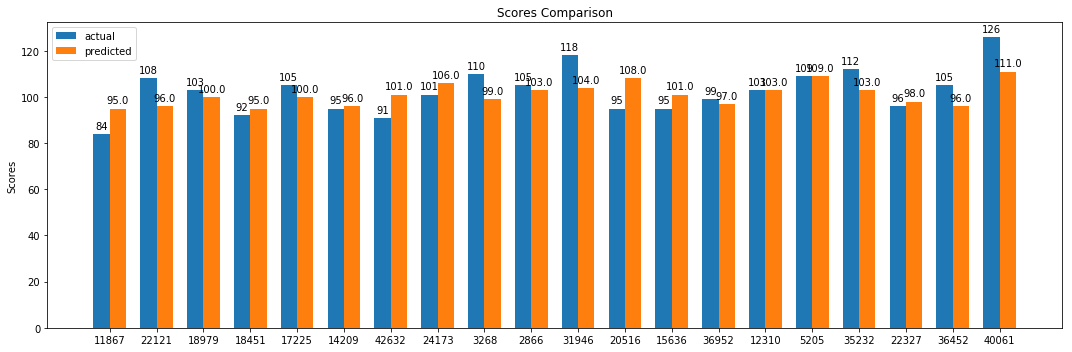

In [59]:
import numpy as np

labels = list(X_test.index)[:20]
actual = list(y_test["TeamScore"])[:20]
actual = [round(x, 0) for x in actual]

predicted = list(y_pred[:,0])[:20]
predicted = [round(x, 0) for x in predicted]

x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,5))
rects1 = ax.bar(x - width/2, actual, width, label='actual')
rects2 = ax.bar(x + width/2, predicted, width, label='predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

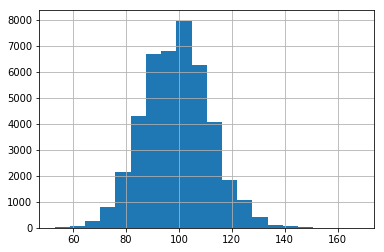

In [61]:
data["TeamScore"].hist(bins=20)
plt.show()

[61, 61, 62, 64, 65, 65, 66, 66, 66, 66, 66, 61, 58, 65, 65, 64, 60, 64, 63, 64, 64, 66, 66, 65, 66, 63, 62, 58, 65, 64, 64, 58, 66, 66, 65, 66, 66, 59, 65, 63, 62, 66, 65, 64, 65, 65, 66, 62, 60, 58, 62, 64, 64, 60, 66, 63, 53, 63, 65, 63, 60, 65, 62, 66, 66, 64, 61, 63, 63, 66, 66, 64, 65, 54, 65, 66, 65, 56, 65, 66, 62, 60, 64, 64, 66, 66, 64, 65, 65, 65, 59, 65, 64, 66, 65, 66, 60, 65, 56, 66, 56, 65, 64, 66, 65, 59, 64, 64, 62, 66, 62, 57, 64, 66, 65, 56, 66, 62, 65, 58, 59, 66, 64, 56, 133, 134, 141, 138, 134, 145, 132, 135, 139, 137, 132, 139, 137, 140, 132, 140, 137, 133, 133, 133, 134, 136, 132, 132, 138, 134, 133, 137, 132, 133, 142, 139, 134, 144, 133, 135, 133, 142, 138, 133, 140, 137, 137, 140, 139, 143, 132, 133, 135, 132, 132, 142, 135, 139, 138, 134, 139, 137, 137, 133, 132, 137, 133, 132, 133, 133, 134, 134, 137, 132, 133, 132, 132, 136, 133, 135, 132, 134, 142, 135, 132, 138, 168, 132, 140, 135, 136, 134, 136, 147, 138, 137, 132, 152, 143, 137, 134, 139, 134, 135, 144

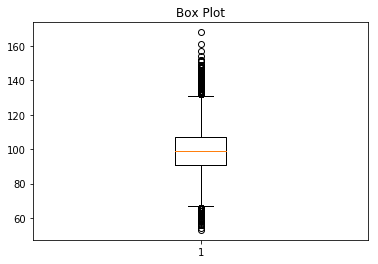

In [68]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
box  = ax1.boxplot(data["TeamScore"])

fly = box['fliers'][0]

outliers = []
for flier in fly.get_ydata():
    outliers.append(flier)

print(outliers)
plt.show()

Coefficients: 
 [[ 2.98034429e+00  3.61509047e-02  1.87377105e+01  2.53742928e+01
  -3.34443241e-01 -1.08078470e+07 -1.08078464e+07  1.08078466e+07
   5.24072352e-01  2.23317840e-02  3.47278566e-01  1.41257205e-01
   4.13102628e-01 -1.63764561e+01  2.70389332e+00  1.26344599e+00
   8.75092480e-01  3.68293732e+07  3.68293723e+07 -3.68293726e+07
   1.89261823e-01 -2.25052074e-01 -4.64742800e-01  1.84088085e-01
  -2.51060864e-01 -6.03443403e-02  3.81934172e-02 -2.05989128e-02
   4.85018586e+00  8.25070857e+00  5.07482640e-01 -2.48973975e+07
  -2.48973979e+07  2.48973976e+07  1.83038198e-01  1.04958673e-01
   5.77752150e-02 -2.25764666e-02  2.71902055e-01 -1.01758310e+01
   1.42249781e+00  1.66644968e+00 -3.31724219e-01  2.12393543e+07
   2.12393548e+07 -2.12393552e+07 -1.04727795e-01 -3.18238019e-01
   5.90649130e-01 -5.28287441e-02  6.44757070e-01  7.91371367e-02
   2.14560559e-01]]
Mean squared error: 96.65
Coefficient of determination: 0.32


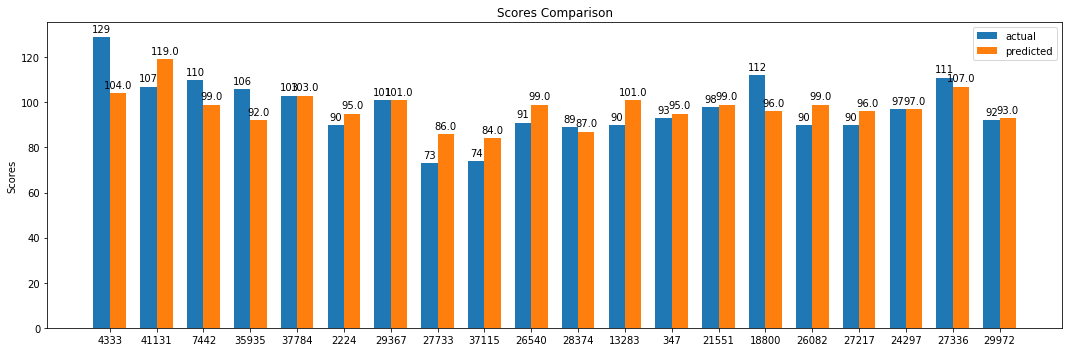

In [71]:
nooutliers = data[(data["TeamScore"] > 66) & (data["TeamScore"] < 132)]


exclude = ["TeamScore"]

features = [x for x in columns if x not in exclude] #List Comprehension

X_train, X_test, y_train, y_test = train_test_split(nooutliers[features], nooutliers[exclude], test_size=0.80, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

labels = list(X_test.index)[:20]
actual = list(y_test["TeamScore"])[:20]
actual = [round(x, 0) for x in actual]

predicted = list(y_pred[:,0])[:20]
predicted = [round(x, 0) for x in predicted]

x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,5))
rects1 = ax.bar(x - width/2, actual, width, label='actual')
rects2 = ax.bar(x + width/2, predicted, width, label='predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<h3>Grid Search</h3>

In [20]:
from sklearn.model_selection import GridSearchCV
 
import warnings
warnings.filterwarnings('ignore')


model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=3)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print(grid.best_params_)

Mean squared error: 103.23
Coefficient of determination: 0.34
{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [48]:
from sklearn.neural_network import MLPRegressor
start_time = time.time()
mpl = MLPRegressor()

mpl.fit(X_train, y_train)

print(regressor.loss_)
print('Loss: %.2f'
      % regressor.loss_)

y_pred = mpl.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



0.01808579294165842
Loss: 0.02
Mean squared error: 109.24
Coefficient of determination: 0.30


In [49]:
start_time = time.time()

regressor = MLPRegressor(hidden_layer_sizes = (100, 75, 50, 25))
regressor.fit(X_train, y_train)

print(regressor.loss_)
print('Loss: %.2f'
      % regressor.loss_)
y_pred = regressor.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

end_time = time.time()

print("Deep regressor traning and predicting finished. Time spent = {:.2f}s.".format(end_time - start_time))

52.350102425761335
Loss: 52.35
Mean squared error: 104.24
Coefficient of determination: 0.33
Deep regressor traning and predicting finished. Time spent = 5.18s.


In [53]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()
parameters = {
    'max_depth':[1,2,4,5,10,12], 
    'min_samples_split':[10,12,15,17], 
    'min_samples_leaf':[10,12,15], 
    'max_features':['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(model,parameters, cv=3)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)


print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print(grid.best_params_)

Mean squared error: 112.78
Coefficient of determination: 0.28
{'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10}
